In [1]:
# Environment setting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mlwpy import *
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = datasets.load_boston()

tts = skms.train_test_split(boston.data,
                            boston.target,
                            test_size=.25,
                            random_state=42)

(boston_train_ftrs, boston_test_ftrs,
 boston_train_tgt, boston_test_tgt) = tts

In [3]:
boston_df = pd.DataFrame(boston.data,
                         columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300,36.2000


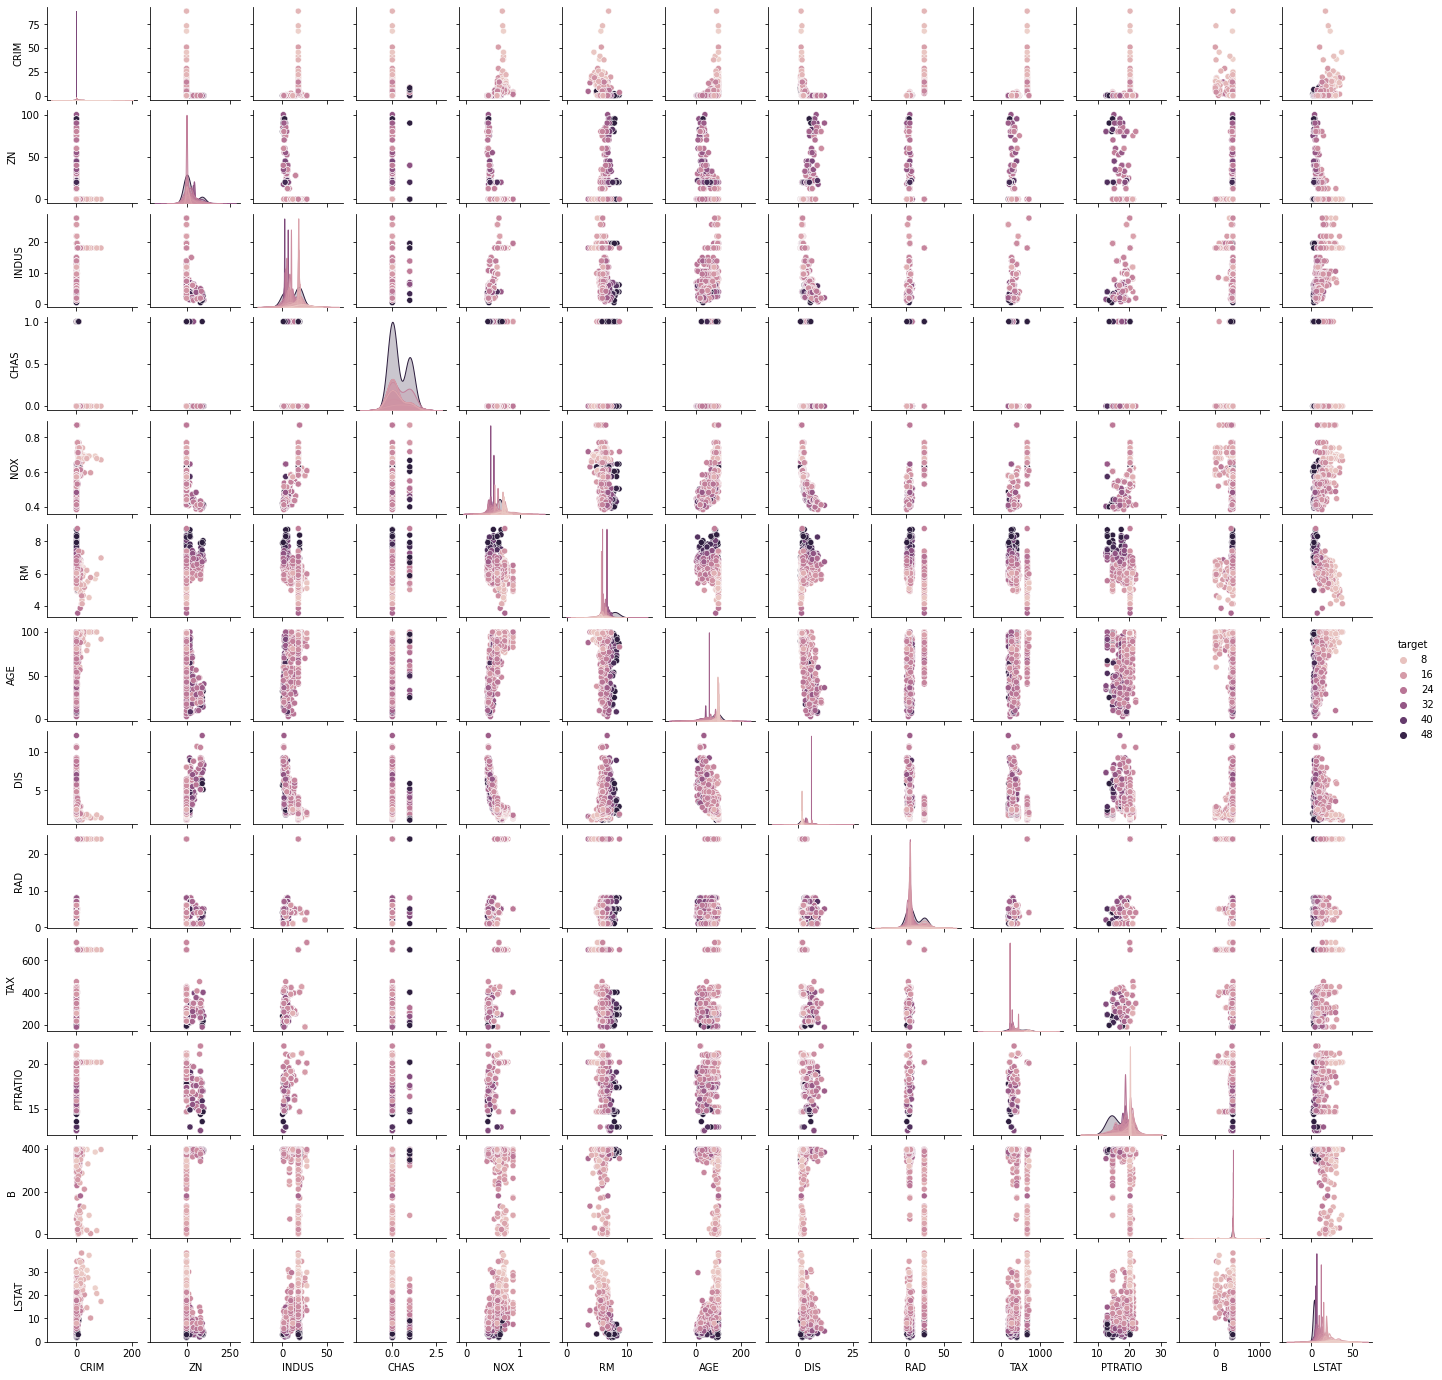

In [4]:
sns.pairplot(boston_df, hue= 'target', height= 1.5)

In [5]:
models = {'KNN': neighbors.KNeighborsRegressor(n_neighbors=3),
          'linreg': linear_model.LinearRegression()}

for name, model in models.items():
    fit = model.fit(boston_train_ftrs, boston_train_tgt)
    preds = fit.predict(boston_test_ftrs)

    score = np.sqrt(metrics.mean_squared_error(boston_test_tgt, preds))
    print("{:>6s} : {:0.2f}".format(name,score))

   KNN : 4.62
linreg : 4.70


Coefficients: 
 [-0.6546]
Mean squared error : 18.56
Coefficient of determination: 0.21


Text(0.5, 1.0, 'Linear Regression practice')

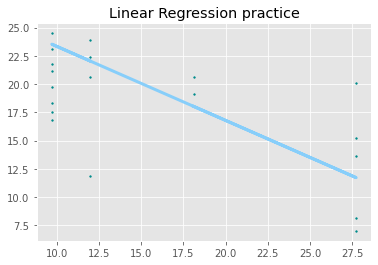

In [6]:
# draw Linear Regression graph

# Load the bostons dataset
boston_X, boston_y = datasets.load_boston(return_X_y=True)
# Use onlt one feature
boston_X = boston_X[:, np.newaxis, 2]
# Split the data into training/testing sets
boston_X_train = boston_X[:-20]
boston_X_test = boston_X[-20:]
boston_y_train = boston_y[:-20]
boston_y_test = boston_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(boston_X_train, boston_y_train)

boston_y_preds =regr.predict(boston_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error : %.2f" % mean_squared_error(boston_y_test, boston_y_preds))
# The coefficient of determination : 1 is perfect prediction
print("Coefficient of determination: %.2f" %r2_score(boston_y_test, boston_y_preds))

# plot outputs

plt.style.use(style= 'ggplot')
plt.scatter(boston_X_test, boston_y_test, color="darkcyan",s=3)
plt.plot(boston_X_test, boston_y_preds, color="lightskyblue", linewidth=3)
plt.title("Linear Regression practice")